In [2]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%load_ext autoreload
%autoreload 2
from util import split_agents, compute_pairwise_distance

In [3]:
from casadi import Opti


In [4]:
import util
from matplotlib.font_manager import FontProperties
font_path = '/usr/share/fonts/truetype/palatino/Palatino Normal.ttf'
# Create FontProperties object with the specified font file
font_prop = FontProperties(fname=font_path)

#### 3-D trajectory simulation

In [23]:
trajectory_data = np.load("admm_consensus_BVC_nonconvex_3.npz")
# trajectory_data = np.load("admm_consensus_BVC_nonconvex_3.npz")

In [24]:
X_full = trajectory_data['X_full']
xr = trajectory_data['xr']
obj_trj = trajectory_data['obj_trj']
obj_hist = trajectory_data['obj_hist']

Text(0, 0.5, 'Cost to go')

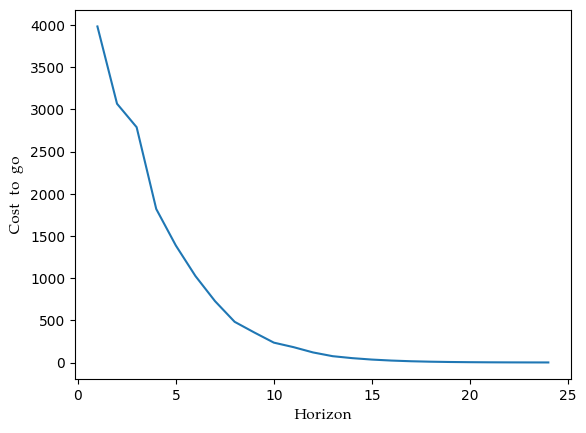

In [25]:
plt.figure(dpi=100)
plt.plot(obj_hist)
plt.xlabel('Horizon',fontproperties=font_prop,fontsize=13)
plt.ylabel('Cost to go',fontproperties=font_prop,fontsize=13)
# plt.savefig('figures/3_drones_convex(cost)')

In [26]:
xr.T

array([[ 1.68088307, -0.0883549 ,  0.5424543 ,  0.        ,  0.        ,
         0.        ,  0.20716832,  0.22938147,  1.45024859,  0.        ,
         0.        ,  0.        , -1.88805139, -0.14102657,  1.08953431,
         0.        ,  0.        ,  0.        ]])

In [27]:
util.distance_to_goal(X_full[-1].flatten(), xr.flatten(),3, 6)

array([0.0638564 , 0.04032479, 0.08627592])

In [28]:
obj_trj

array(934.28492372)

In [29]:
x_dims = [6]*3

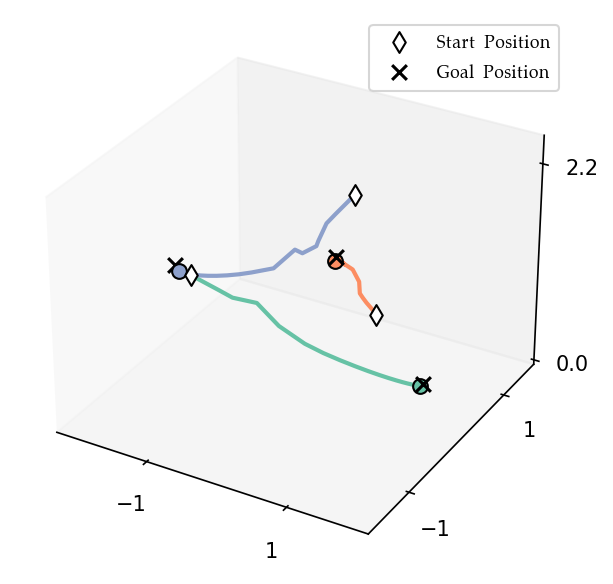

In [31]:
plt.figure(dpi=150)
util.plot_solve(X_full, float(obj_trj), xr, x_dims, True, 3)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"],prop=font_prop)
plt.gca().set_xticks([-1,1.0])
plt.gca().set_yticks([-1,1])
plt.gca().set_zticks([0,2.2])
plt.gca().grid('')
plt.title("");

# plt.gca().view_init(elev=90, azim=0)
# plt.gca().set_zticks([])
plt.savefig('figures/BVC_3_drones_nonconvex', bbox_inches='tight', dpi=200)
# plt.show()

In [32]:
compute_pairwise_distance(X_full,x_dims).min(),compute_pairwise_distance(X_full,x_dims).max()

(0.9965770564508426, 3.492205570438474)

In [33]:
compute_pairwise_distance(X_full,x_dims).shape

(25, 3)

In [34]:
r_min= 2*0.3

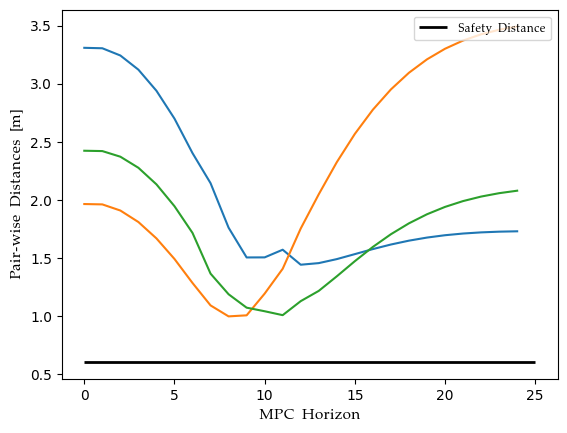

In [35]:
plt.figure(dpi=100)
plt.plot(compute_pairwise_distance(X_full,x_dims),label='')
plt.hlines(r_min, 0, X_full.shape[0] ,color='k',linewidth=2)
plt.ylabel('Pair-wise Distances [m]',fontproperties=font_prop,fontsize=13)
plt.xlabel('MPC Horizon',fontproperties=font_prop,fontsize=13)
# plt.legend(['safety distance'],loc = 'upper right', prop = font_prop, fontsize=14)
# plt.gca().legend(['safety distance'],loc = 'upper right', prop = font_prop, fontsize=14)
plt.legend(plt.gca().get_children()[3:4],['Safety Distance'],loc = 'upper right', prop = font_prop, fontsize=14)
plt.savefig('figures/3_drones_pairwise_distances(nonconvex).png',dpi=200)